# Ligand Fragmentation
In this notebook, we use the auto-fragmentation tool to break up all of the ligands. First load in the metadata.

In [1]:
from os.path import join, exists
from futile.Utils import ensure_dir

tempdir = "temp"
outdir = "processed-structures"
picdir = "pictures"

fragdir = "fragments"
ensure_dir(fragdir)

ligdir = "ligand_run"
ensure_dir(ligdir)

False

In [2]:
from pickle import load
pname = "updated-data.pickle"
with open(pname, "rb") as ifile:
    data = load(ifile)

Read in the geometry file.

In [3]:
from BigDFT.IO import read_pdb
fullsystems = {}
for geom in data["Crystal ID"]:
    pname = join(outdir, geom+"-m.pdb")
    with open(pname) as ifile:
        fullsystems[geom] = read_pdb(ifile)

Extract the ligand from the subsystem.

In [4]:
from BigDFT.Systems import System
systems = {}
for geom in data["Crystal ID"]:
    systems[geom] = System()
    systems[geom]["LIG:0"] = fullsystems[geom]["LIG:0"]

For the systems that have a covalent bond, we need to add in a hydrogen atom to cap the ligand.

In [5]:
from BigDFT.Fragments import pairwise_distance, distance, Fragment

from numpy import argmin, array
from numpy.linalg import norm
from copy import deepcopy

# Bond lengths for link atoms.
bond_lengths = {"C": 2.0598, "N": 1.90862, "O": 1.81414}

for geom, link, site in zip(data["Crystal ID"], data["Link"], data["Site"]):
    if "cov" in site:
        full = fullsystems[geom]
        sys = deepcopy(systems[geom])

        # Find the nearest link atom.
        distlist = [pairwise_distance(Fragment([x]), sys["LIG:0"]) for x in full[link]]
        linkatom = deepcopy(full[link][argmin(distlist)])

        # Find the connecting atom
        distlist = [distance(Fragment([x]), Fragment([linkatom])) for x in sys["LIG:0"] if x.sym != 'H']
        conatom = sys["LIG:0"][argmin(distlist)]

        # Shift to a more realistic distance.
        pos1 = array(linkatom.get_position("bohr"))
        pos2 = array(conatom.get_position("bohr"))
        vec = pos2 - pos1
        vec *= bond_lengths[conatom.sym]/norm(vec)

        newpos = [x + y for x, y in zip(pos1, vec)]
        linkatom.set_position(newpos, units="bohr")

        # Add in the hydrogen version
        linkatom.sym = "H"
        linkatom["name"] = "H"
        linkatom.is_link = True
        sys["LIG:0"] += [linkatom]

        systems[geom] = deepcopy(sys)

## BigDFT Calculation
Here we run a calculation on just the Ligand using BigDFT.

In [6]:
from BigDFT.Inputfiles import Inputfile
from BigDFT.Calculators import SystemCalculator

In [7]:
inp = Inputfile()
inp.set_hgrid(0.4)
inp.set_xc("PBE")
inp.write_support_function_matrices()
inp["import"] = "linear"
inp["lin_general"]["output_coeff"] = 1

In [8]:
code = SystemCalculator()
code.update_global_options(skip=True)
# code.update_global_options(dry_run=True)

Initialize a Calculator with OMP_NUM_THREADS=2 and command mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft


In [9]:
logs = {}
for geom in data["Crystal ID"]:
    logs[geom] = code.run(input=inp, posinp=systems[geom].get_posinp(), name=geom, run_dir=ligdir)

Creating the yaml input file "ligand_run/Mpro-x0072.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0072 -s Yes
Creating the yaml input file "ligand_run/Mpro-x0104.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0104 -s Yes
Creating the yaml input file "ligand_run/Mpro-x0107.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0107 -s Yes
Creating the yaml input file "ligand_run/Mpro-x0161.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0161 -s Yes
Creating the yaml input file "ligand_run/Mpro-x0195.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0195 -s Yes
Creating the ya

Creating the yaml input file "ligand_run/Mpro-x0978.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0978 -s Yes
Creating the yaml input file "ligand_run/Mpro-x0981.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0981 -s Yes
Creating the yaml input file "ligand_run/Mpro-x1308.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x1308 -s Yes
Creating the yaml input file "ligand_run/Mpro-x1311.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x1311 -s Yes
Creating the yaml input file "ligand_run/Mpro-x1334.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x1334 -s Yes
Creating the ya

Creating the yaml input file "ligand_run/Mpro-x0499.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0499 -s Yes
Creating the yaml input file "ligand_run/Mpro-x1119.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x1119 -s Yes
Creating the yaml input file "ligand_run/Mpro-x0376.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0376 -s Yes
Creating the yaml input file "ligand_run/Mpro-x0165.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0165 -s Yes
Creating the yaml input file "ligand_run/Mpro-x0336.yaml"
Run directory ligand_run
Executing command:  mpirun -np 1 /Users/dawson/Documents/CEA/Binaries/bds/install/bin/bigdft -n Mpro-x0336 -s Yes
Creating the ya

## Auto Fragmentation
Now we perform auto-fragmentation on each ligand.

In [10]:
from BigDFT.PostProcessing import BigDFTool
btool = BigDFTool()

In [44]:
def iterative_fragment(sys, log, iterations):
    from scipy.io import mmread
    from copy import deepcopy
    from BigDFT.Systems import System
    from BigDFT.Fragments import Fragment

    datadir = join(log.srcdir, log.data_directory)
    k = mmread(join(datadir, "density_kernel_sparse.mtx"))
    s = mmread(join(datadir, "overlap_sparse.mtx"))
    kxs = k.dot(s)
    
    atsys = System()
    for i, at in enumerate(sys["LIG:0"]):
        atsys["ATOM:"+str(i)] = Fragment([at])
    resys = deepcopy(atsys)
    
    pv = btool.run_compute_purity(resys, log, kxs=kxs)
    bo = btool.fragment_bond_order(resys, resys.keys(), resys.keys(), log, kxs=kxs)

    worst_pv = min(pv.values())
    worst_size = len(list(sys.keys()))
    
    for i in range(iterations):
        newsys = btool.auto_fragment(atsys, pv, bo, 0.05, rand=True)
        if worst_size < len(list(newsys.keys())):
            resys = newsys
        elif worst_size == len(list(newsys.keys())):
            new_pv = {x: y.purity_indicator for x, y in newsys.items()}
            if worst_pv < min(new_pv.values()):
                resys = newsys
        
    return_sys = System()
    for i, fragid in enumerate(resys):
        return_sys["LIG:"+str(i)] = resys[fragid]
    return return_sys

In [45]:
from BigDFT.IO import write_pdb
from pickle import dump

frag_sys = {}
for geom in data["Crystal ID"]:
    pname1 = join(tempdir, geom+"-fragment.pdb")
    pname2 = join(tempdir, geom+"-fragment.pickle")
    if exists(pname1) and exists(pname2):
        with open(pname2, "rb") as ifile:
            frag_sys[geom] = load(ifile)
    else:
        frag_sys[geom] = iterative_fragment(systems[geom], logs[geom], 1000)
        with open(pname1, "w") as ofile:
            write_pdb(frag_sys[geom], ofile)
        with open(pname2, "wb") as ofile:
            dump(frag_sys[geom], ofile)

Summarize the number of fragments.

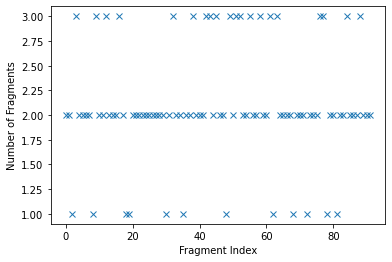

In [46]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,1)

axs.set_ylabel("Number of Fragments")
axs.set_xlabel("Fragment Index")

axs.plot([len(x.keys()) for x in frag_sys.values()], 'x')

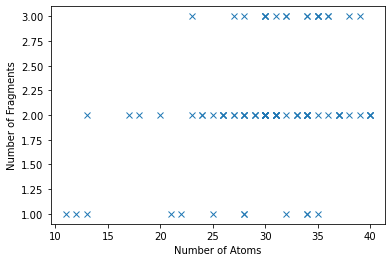

In [47]:
fig, axs = plt.subplots(1,1)

axs.set_ylabel("Number of Fragments")
axs.set_xlabel("Number of Atoms")

axs.plot([sum([len(x) for x in y.values()]) for y in frag_sys.values()], 
         [len(x.keys()) for x in frag_sys.values()], 'x')

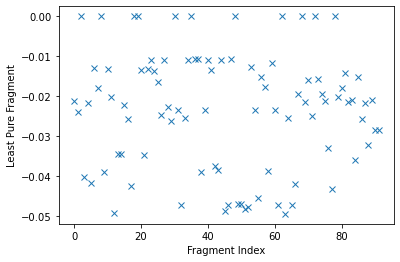

In [48]:
fig, axs = plt.subplots(1,1)

axs.set_ylabel("Least Pure Fragment")
axs.set_xlabel("Fragment Index")

axs.plot([min([x.purity_indicator for x in y.values()]) for y in frag_sys.values()], 'x')

## Fragment Images
Last we will generate some iamges of these fragments.

In [50]:
from BigDFT.Systems import GetFragTuple
from BigDFT.Visualization import _find_colours
from os import system

for geom in data["Crystal ID"]:
    oname1 = join(tempdir, geom+"-autofrag.pml")
    oname2 = join(picdir, geom+"-autofrag.png")
    
    if exists(oname1) and exists(oname2):
        continue
        
    with open(oname1, "w") as ofile:
        ofile.write("load " + join(tempdir, geom+"-fragment.pdb") + "\n")
        ofile.write("hide everything\n")
        ofile.write("show licorice sticks\n")

        clist = _find_colours(len(frag_sys[geom].keys()))

        for i, fragid in enumerate(frag_sys[geom]):
            fname, fid = GetFragTuple(fragid)
            color = clist["html"][i].replace("#","0x")
            ofile.write("color " + color + ", resid " + str(fid) + "\n")
        ofile.write("bg_color white\n")
        ofile.write("png " + join(oname2) + ", width=10cm, dpi=300, ray=1\n")
        ofile.write("quit\n")
    system("pymol " + oname1)

## Writing Out The Fragments
We here write out the fragments to a pdb file. To do so, we need to first remove the link atoms.

In [53]:
for geom, site in zip(data["Crystal ID"], data["Site"]):
    pname = join(outdir, geom+"-combined.pdb")
    if exists(pname):
        continue
    if "cov" in site:
        sys = System()
        for fragid, frag in frag_sys[geom].items():
            sys[fragid] = Fragment()
            for at in frag:
                if not at.get("link_atom", False):
                    sys[fragid] += Fragment([at])
    else:
        sys = frag_sys[geom]
        
    outsys = deepcopy(fullsystems[geom])
    for fragid in sys:
        outsys[fragid] = sys[fragid]
    
    with open(pname, "w") as ofile:
        write_pdb(outsys, ofile)